Data Downloaded From https://archive.ics.uci.edu/dataset/1/abalone

In [1]:
install.packages('ggplot2')
install.packages('GGally')

library(ggplot2)
library(GGally)


data = read.csv('abalone/abalone.data', header = FALSE)

colnames(data) <- c("Sex( M,F,Infant)", "Length (mm)", "Diameter (mm)", "Height (mm)", "Whole_weight (g)", "Shucked_weight (g)", "Viscera_weight (g)", "Shell_weight (g)", "Rings")
cat('Number of total Raw Observations: ', nrow(data), '\n')
# Removes Duplicates
data <- unique(data)
cat('Number of Unique Observations with possible missing values: ',nrow(data), '\n')

#Dealing With Missing Values
    #We were told that there are no missing values, but its always a good idea to ensure that is the case.
    #So in the event we have NA values:
        #Since we are using this data to predict, I think the best thing would be to just remove the rows with na values, 
        #we could fill them with the mean for that varaible, but that could impact the accuarcy of our prediction model.

data <- na.omit(data)
cat('Number of Unique Observations after dealing with missing values: ',nrow(data), '\n')

#based on the output of nrow, it seems there were no missing values as expected


#Looks to be in a clean and tidy fromat
head(data)
cat('Number of observations after cleaning: ',nrow(data), '\n')


The downloaded binary packages are in
	/var/folders/rd/9nbcv3cs77b4zg8s993nhqrc0000gn/T//RtmpSJDzKd/downloaded_packages

The downloaded binary packages are in
	/var/folders/rd/9nbcv3cs77b4zg8s993nhqrc0000gn/T//RtmpSJDzKd/downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Number of total Raw Observations:  4177 
Number of Unique Observations with possible missing values:  4177 
Number of Unique Observations after dealing with missing values:  4177 


,"Sex( M,F,Infant)",Length (mm),Diameter (mm),Height (mm),Whole_weight (g),Shucked_weight (g),Viscera_weight (g),Shell_weight (g),Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Number of observations after cleaning:  4177 



Based on the above outputs, our data is pretty clean, and looking at the Data Type for each variable, everything makes sense.

In [2]:
summary(data)

 Sex( M,F,Infant)    Length (mm)    Diameter (mm)     Height (mm)    
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
 Whole_weight (g) Shucked_weight (g) Viscera_weight (g) Shell_weight (g)
 Min.   :0.0020   Min.   :0.0010     Min.   :0.0005     Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860     1st Qu.:0.0935     1st Qu.:0.1300  
 Median :0.7995   Median :0.3360     Median :0.1710     Median :0.2340  
 Mean   :0.8287   Mean   :0.3594     Mean   :0.1806     Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020     3rd Qu.:0.2530     3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880     Max.   :0.7600     Max.   :1.0050  

Brief Desription of our Data (Same as Assignment 1)
- There are 4177 instances/observations in the data.
- There are 9 variables in the data:
    - Sex which a catergoical variable which can be either Male, Female, or Infant.
    - Length of the logest shell, which is measured in mm and is continuous.
    - Diameter which is perpendicual to the Length, also measured in mm and is continuous.
    - Height with meat in the shell in mm and is continuous.
    - Whole Weight of the Abalone in grams and is continuous.
    - Shucked Weight, which is the entire weight of the meat in grams and is continuous.
    - Viscera Weight which is the weight of the gut after bleeding in grams and is continuous.
    - Shell Weight which is measured after the shell is dried in grams and is continuous.
    - Rings, the number of Rings present, adding 1.5 gives the age in terms of Years and is an Integer.
- There are no missing values
- They mention "the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)." (Albalone, UCI)
This information was sourced from http://archive.ics.uci.edu/dataset/1/abalone, which is also where the data is from. 

The question I want to answer using the Abalone dataset is which set of physical characteristic variables will provide the most accurate prediction of the number of rings of an Abalone. The number of rings will allow us to calculate the age of the Abalone. 

In order to answer this question, we need to examine all of the explanatory variables that we have, each of which represents a different physical characteristic. We need to compare the explanatory variables on their own to the response variable Rings but also among each other.

In order to obtain reliable results, it's essential to eliminate any confounding variables and address high correlations among predictors, a phenomenon known as multicollinearity. Multicollinearity adversely affects the standard error and can compromise the reliability of our predictions.

I opted for the ggpairs plot below, due to its ability to display correlations between variables, enabling us to identify and address multicollinearity. Furthermore, the plot categorizes the data into the three sex categories: Male, Female, and Infant. This division allows us to discern specific correlations, such as whether height strongly correlates with length in infants and males but not in females. Investigating such patterns is crucial.

Moreover, the plot provides insights into the distribution of each variable based on sex. For instance, when examining the length column, it becomes apparent that regardless of other parameters, infants are consistently shorter than male and female adults. This observation aligns with our expectations, considering that infants are still in their developmental stages compared to adults.

Another interesting development I got from this plot was that the distribution of each variable is pretty similar for all 3 categories of Sex, and the variable Height has the narrowest distribution amongst its values.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


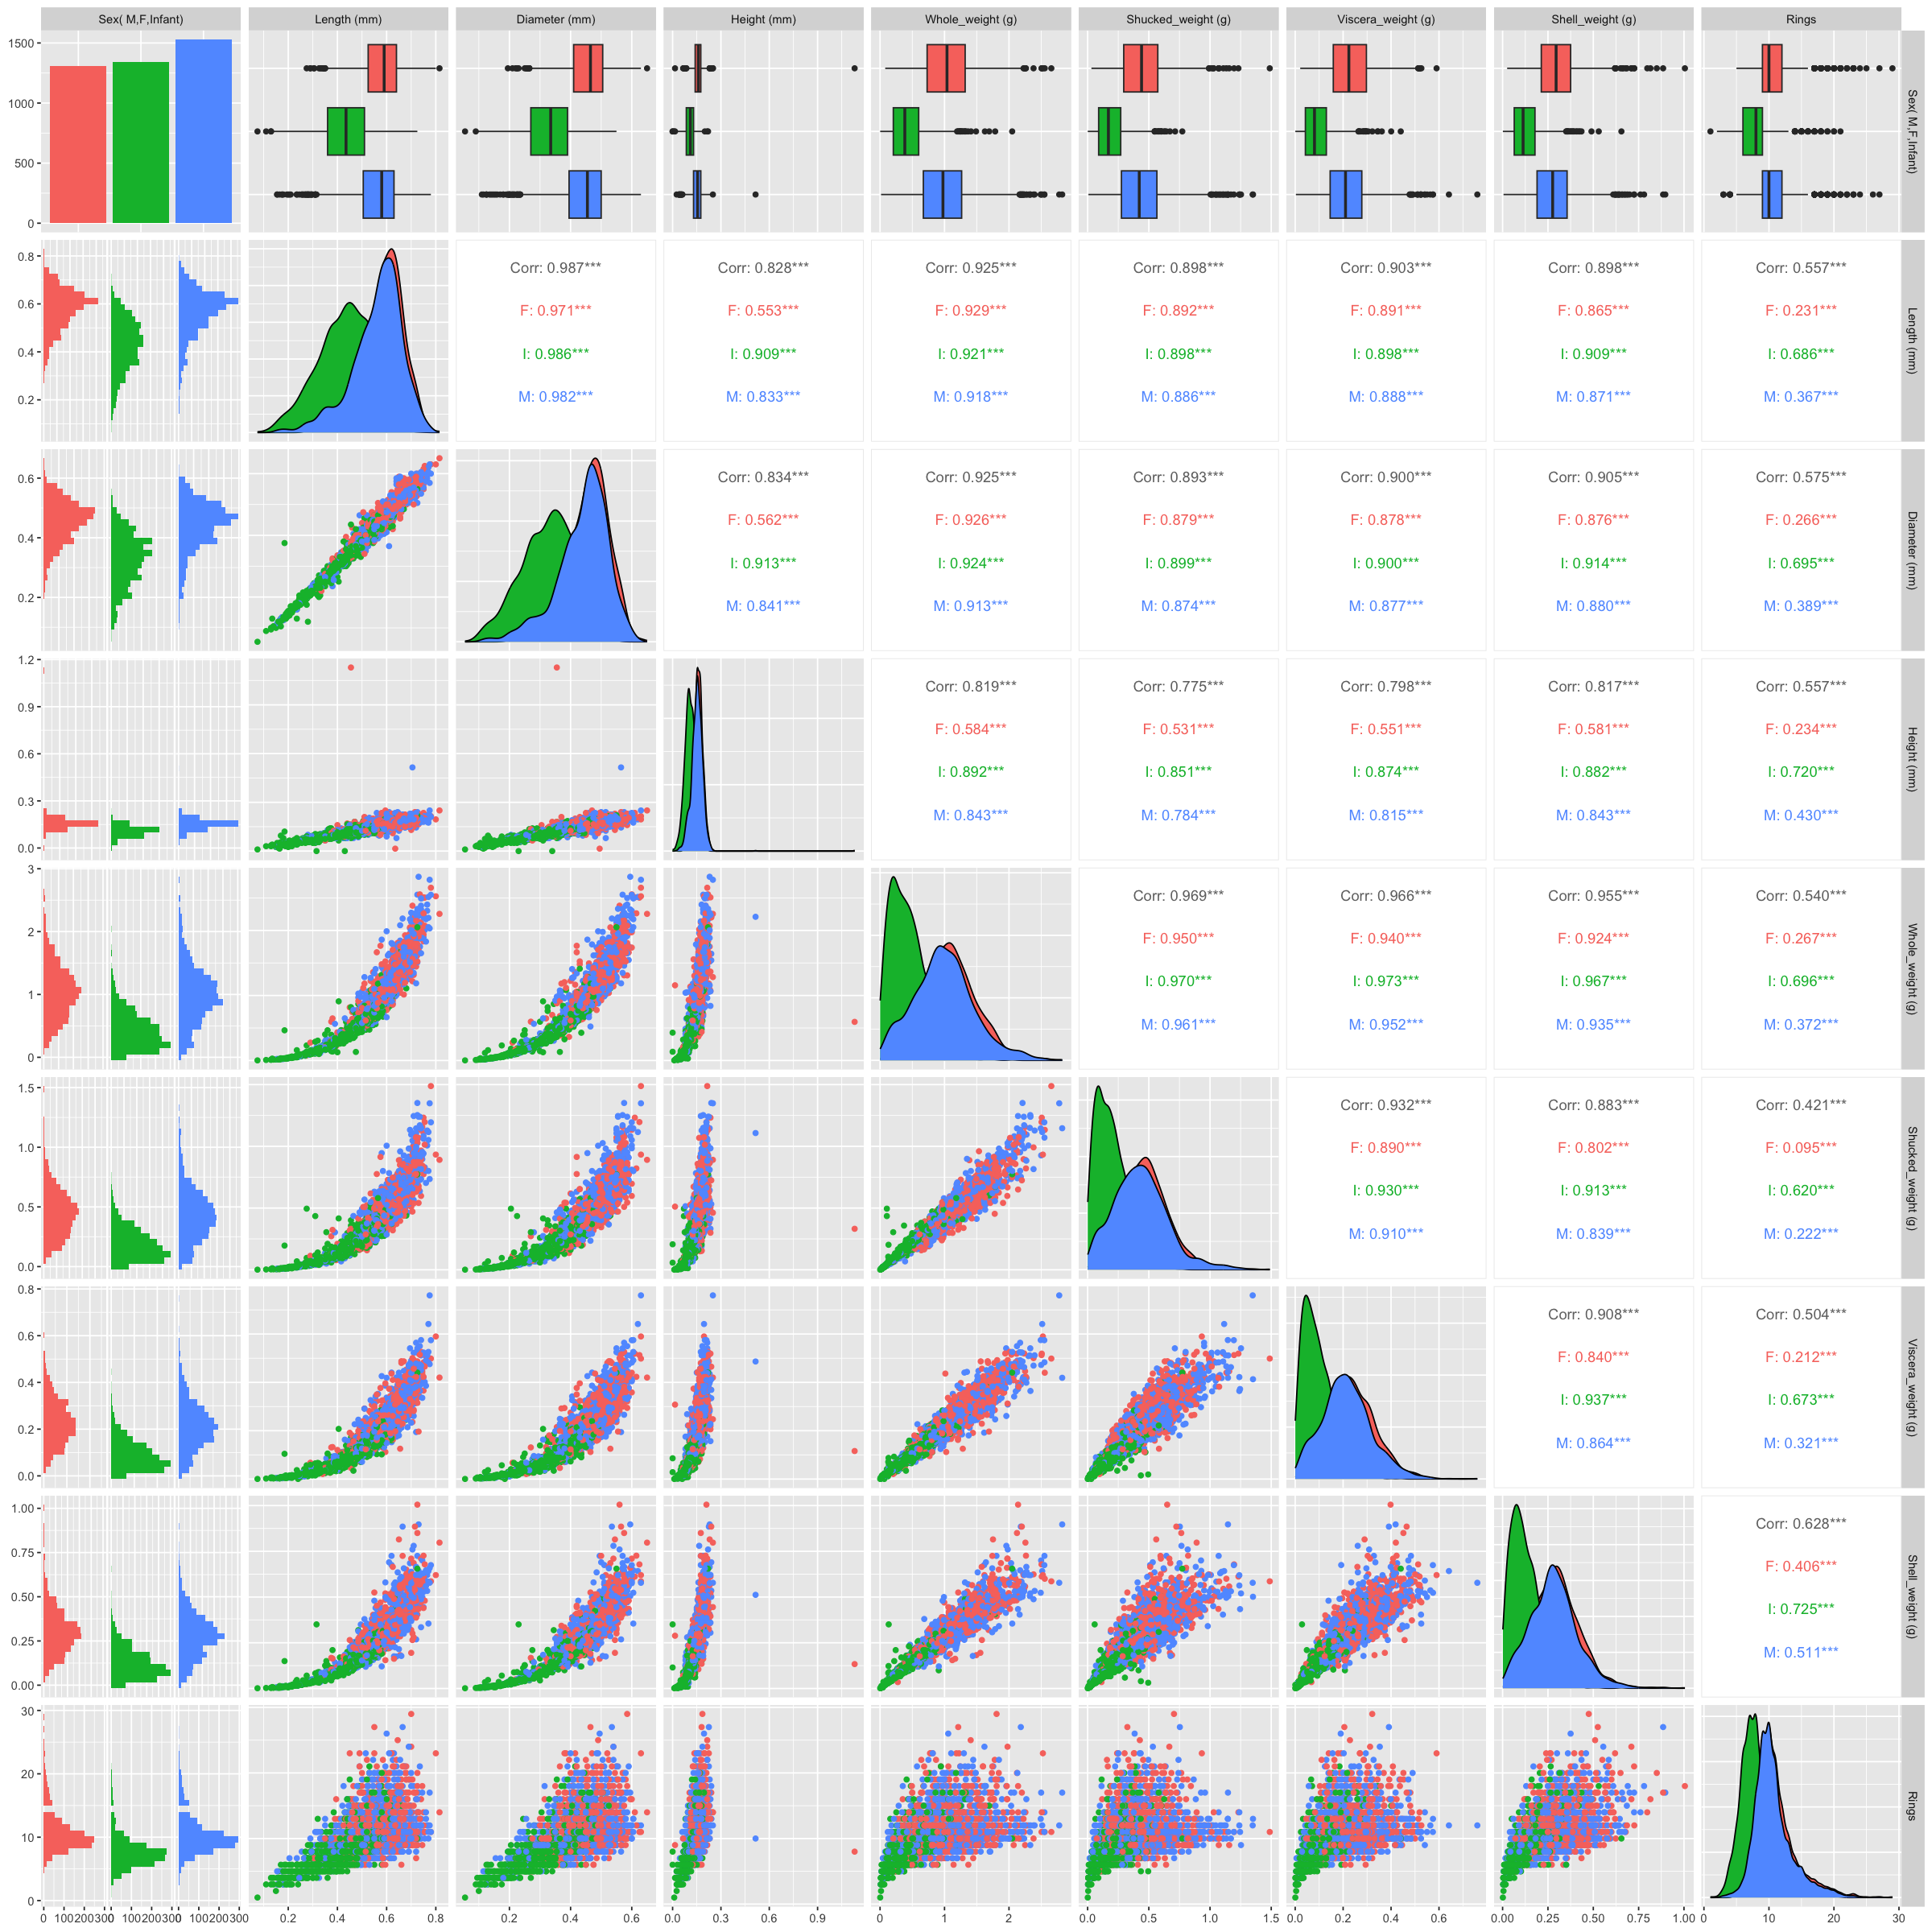

In [3]:
options(repr.plot.width=20,repr.plot.height=20)
ggpairs(data,
        aes(color = `Sex( M,F,Infant)`))